In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
tot_lat_range = (-90, 90)
tot_lng_range = (-180, 180)

In [155]:
# test
x = "Atlanta"
url = "http://api.openweathermap.org/data/2.5/weather?"
tryit = requests.get(url + "appid="+ api_key + "&q=" + x+"&units=imperial").json()
print(tryit)


{'coord': {'lon': -84.39, 'lat': 33.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.51, 'pressure': 1011, 'humidity': 40, 'temp_min': 68, 'temp_max': 75.2}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1575149166, 'sys': {'type': 1, 'id': 4155, 'country': 'US', 'sunrise': 1575116603, 'sunset': 1575152961}, 'timezone': -18000, 'id': 4180439, 'name': 'Atlanta', 'cod': 200}


In [156]:
# List for holding lat_lngs & cities by quarter

# NW
lat_lngs_q1 = []
cities_q1 = []
# NE
lat_lngs_q2 = []
cities_q2 = []
# SW
lat_lngs_q3 = []
cities_q3 = []
# SE
lat_lngs_q4 = []
cities_q4 = []

# Create a set of random lat and lng combinations
lats1 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs1 = np.random.uniform(low=-180.000, high=00.000, size=400)

lats2 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs2 = np.random.uniform(low=-00.000, high=180.000, size=400)

lats3 = np.random.uniform(low=-90.000, high=00.000, size=500)
lngs3 = np.random.uniform(low=-180.000, high=00.000, size=500)

lats4 = np.random.uniform(low=-90.000, high=00.000, size=400)
lngs4 = np.random.uniform(low=-0.000, high=180.000, size=400)

lat_lngs_q1 = zip(lats1, lngs1)
lat_lngs_q2 = zip(lats2, lngs2)
lat_lngs_q3 = zip(lats3, lngs3)
lat_lngs_q4 = zip(lats4, lngs4)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q1:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q1:
        cities_q1.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q2:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q2:
        cities_q2.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q3:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q3:
        cities_q3.append(city)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q4:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q4:
        cities_q4.append(city)

# Print the city count to confirm sufficient count
print("Total Cities")
print(len(cities_q1))
print(len(cities_q2))
print(len(cities_q3))
print(len(cities_q4))

Total Cities
192
259
104
131


In [157]:
total_cities = (cities_q1 + cities_q2 + cities_q3 + cities_q4)
len(total_cities)

686

In [158]:
# Build query, create loop
#query_url = url + "appid="+ api_key + "&q=" + x
#response = requests.get(query_url)
#response_json = response.json()

print("Begin to record city weather data.")
print("--- --- --- --- --- --- --- --- --- ---")

url = "http://api.openweathermap.org/data/2.5/weather?"
#weather_data = []
city_name = []
country = []
lat = []
lon = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
record = 1

for city in total_cities:    
    try:
        query_url = url + "appid="+ api_key + "&q=" + city +"&units=imperial"

        # Query city
        weather_response = requests.get(query_url).json()

        # Store data 
       # weather_data.append(weather_response)
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        
        # Print Query City
        print("Processing data for Record "+str(record)+": "+ city)
        
        # Add number counter
        record += 1
        # Slow it down for api rate
        time.sleep(.5)

    # If no data, try next city
    except:
        print("Data not found. Skipping...")
print("--- --- --- --- --- --- --- --- --- ---")
print("End.")

Begin to record city weather data.
--- --- --- --- --- --- --- --- --- ---
Processing data for Record 1: bonthe
Processing data for Record 2: college
Processing data for Record 3: north battleford
Data not found. Skipping...
Processing data for Record 4: atuona
Processing data for Record 5: kodiak
Processing data for Record 6: tulum
Processing data for Record 7: guerrero negro
Processing data for Record 8: sept-iles
Processing data for Record 9: kapaa
Processing data for Record 10: adrar
Processing data for Record 11: kingsport
Processing data for Record 12: thompson
Processing data for Record 13: puerto escondido
Data not found. Skipping...
Processing data for Record 14: barrow
Data not found. Skipping...
Processing data for Record 15: saint george
Data not found. Skipping...
Processing data for Record 16: hofn
Data not found. Skipping...
Processing data for Record 17: yellowknife
Processing data for Record 18: qaanaaq
Processing data for Record 19: hermiston
Processing data for Recor

Processing data for Record 184: chokurdakh
Processing data for Record 185: yasnogorsk
Processing data for Record 186: nikolskoye
Processing data for Record 187: metu
Data not found. Skipping...
Data not found. Skipping...
Processing data for Record 188: yaan
Data not found. Skipping...
Processing data for Record 189: katsuura
Data not found. Skipping...
Processing data for Record 190: yar-sale
Processing data for Record 191: petropavlovsk-kamchatskiy
Data not found. Skipping...
Processing data for Record 192: shirokiy
Processing data for Record 193: shingu
Processing data for Record 194: cherskiy
Processing data for Record 195: ust-omchug
Processing data for Record 196: batagay-alyta
Processing data for Record 197: dikson
Processing data for Record 198: czersk
Processing data for Record 199: talnakh
Processing data for Record 200: saskylakh
Processing data for Record 201: hobyo
Data not found. Skipping...
Processing data for Record 202: pryozerne
Processing data for Record 203: kamaish

Processing data for Record 360: marsa
Processing data for Record 361: bayan
Processing data for Record 362: pavilosta
Processing data for Record 363: pundaguitan
Processing data for Record 364: khandbari
Data not found. Skipping...
Processing data for Record 365: chara
Data not found. Skipping...
Processing data for Record 366: namatanai
Processing data for Record 367: kanigiri
Processing data for Record 368: kysyl-syr
Processing data for Record 369: ishigaki
Processing data for Record 370: sladkovo
Processing data for Record 371: tongchuan
Processing data for Record 372: rudnichnyy
Processing data for Record 373: zhuhai
Processing data for Record 374: mayskiy
Processing data for Record 375: anadyr
Processing data for Record 376: ternate
Processing data for Record 377: traismauer
Processing data for Record 378: ca mau
Processing data for Record 379: bontang
Processing data for Record 380: umm lajj
Data not found. Skipping...
Processing data for Record 381: kropotkin
Processing data for

Processing data for Record 545: nkhotakota
Processing data for Record 546: batemans bay
Processing data for Record 547: russell
Processing data for Record 548: longido
Processing data for Record 549: hambantota
Processing data for Record 550: cairns
Processing data for Record 551: caconda
Processing data for Record 552: bambous virieux
Processing data for Record 553: phalaborwa
Processing data for Record 554: buin
Processing data for Record 555: kruisfontein
Processing data for Record 556: bundaberg
Processing data for Record 557: buala
Data not found. Skipping...
Processing data for Record 558: namatanai
Processing data for Record 559: boende
Data not found. Skipping...
Processing data for Record 560: kavieng
Processing data for Record 561: malanje
Processing data for Record 562: charters towers
Processing data for Record 563: merauke
Processing data for Record 564: dordrecht
Processing data for Record 565: morwell
Data not found. Skipping...
Processing data for Record 566: waitati
Da

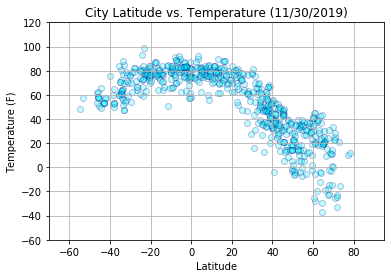

In [186]:
temp_VS_lat = pd.DataFrame({"lat":lat, "temp": temp})
plt.scatter(temp_VS_lat["lat"], temp_VS_lat["temp"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Temperature (11/30/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(-60, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("Latitude_vs_Temp.png")
plt.show()

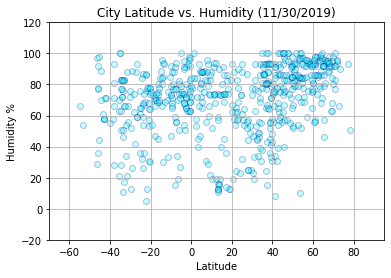

In [179]:
hum_VS_lat = pd.DataFrame({"lat":lat, "hum": humidity})
plt.scatter(hum_VS_lat["lat"], hum_VS_lat["hum"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Humidity (11/30/2019)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

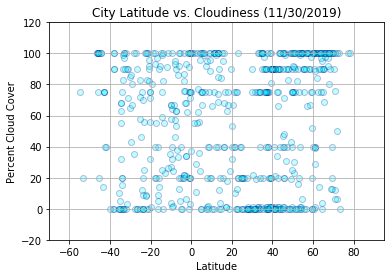

In [178]:
cloud_VS_lat = pd.DataFrame({"lat":lat, "clou": cloudiness})
plt.scatter(cloud_VS_lat["lat"], cloud_VS_lat["clou"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Cloudiness (11/30/2019)")
plt.ylabel("Percent Cloud Cover")
plt.xlabel("Latitude")
plt.ylim(-20, 120)
plt.xlim(-70, 95)
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

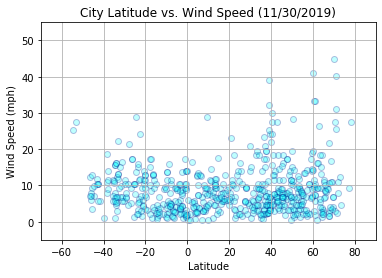

In [191]:
wind_VS_lat = pd.DataFrame({"lat":lat, "wind": wind_speed})
plt.scatter(wind_VS_lat["lat"], wind_VS_lat["wind"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Wind Speed (11/30/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylim(-5, 55)
plt.xlim(-70, 90)
plt.grid(True)
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

In [192]:
global_weather_conditions_df = pd.DataFrame({
    "City Name": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloud Cover (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
})
global_weather_conditions_df

,City Name,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,Bonthe,SL,7.53,-12.50,80.58,82,1,5.48
1,College,US,64.86,-147.80,19.54,92,90,3.09
2,North Battleford,CA,52.78,-108.30,17.83,72,90,3.36
3,Atuona,PF,-9.80,-139.03,79.09,73,67,13.78
4,Kodiak,US,39.95,-94.76,55.13,43,1,21.92
...,...,...,...,...,...,...,...,...
596,Port Augusta,AU,-32.49,137.76,54.21,66,90,9.17
597,Port Hedland,AU,-20.31,118.58,82.40,30,32,9.17
598,Wanaka,NZ,-44.70,169.14,49.17,89,100,9.93
599,Martapura,ID,-3.41,114.85,74.61,95,76,2.24


In [193]:
global_weather_conditions_df.to_csv("global_weather_conditions_11302019.csv")